<center><h1> AI Enterprise Final Project

<h1>Facial emotion detection for customer relationship management

    
<h4>Maviya Javed Shaikh - 100766785
<h4>Meryl Gabrielle Tubio – 100763231
    <h4>Nandini Malhotra – 100768797 </center>



Detecting facial landmarks is a subset of the shape prediction problem. Given an input image (and normally an ROI that specifies the object of interest), a shape predictor attempts to localize key points of interest along the shape.

In the context of facial landmarks, our goal is detect important facial structures on the face using shape prediction methods.

Detecting facial landmarks is therefore a two step process:

Step #1: Localize the face in the image.

Step #2: Detect the key facial structures on the face ROI.

Face detection (Step #1) can be achieved in a number of ways.
We could use OpenCV’s built-in Haar cascades.
Or we might even use deep learning-based algorithms for face localization.

In either case, the actual algorithm used to detect the face in the image doesn’t matter. Instead, what’s important is that through some method we obtain the face bounding box (i.e., the (x, y)-coordinates of the face in the image).

Given the face region we can then apply Step #2: detecting key facial structures in the face region.

There are a variety of facial landmark detectors, but all methods essentially try to localize and label the following facial regions:
Mouth

Right eyebrow

Left eyebrow

Right eye

Left eye

Nose

Jaw

This method starts by using:

1. A training set of labeled facial landmarks on an image. These images are manually labeled, specifying specific (x, y)-coordinates of regions surrounding each facial structure.
2. Priors, of more specifically, the probability on distance between pairs of input pixels.

# Understanding facial expression detector
The pre-trained facial landmark detector inside the dlib library is used to estimate the location of 68 (x, y)-coordinates that map to facial structures on the face.
We are using the model already trained, we will need to download the file shape_predictor_68_face_landmarks.dat that you can find it quickly in the net .
The indexes of the 68 coordinates can be visualized on the image below:

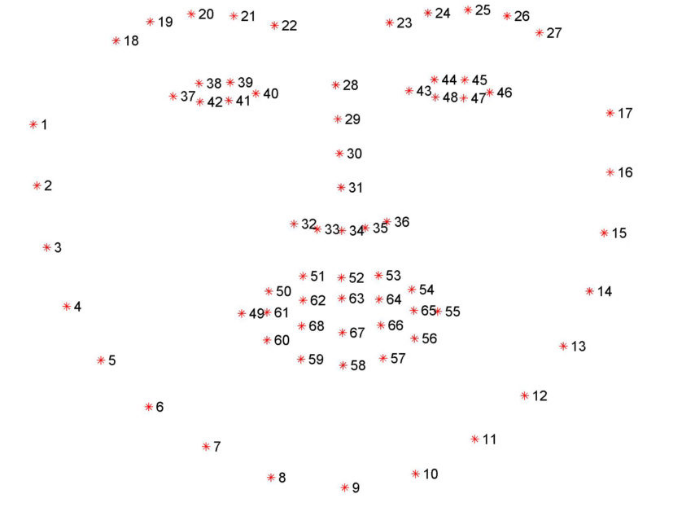

# Importing libraries

In [1]:

import numpy as np 
import pandas as pd 
import cv2



In [4]:
df = pd.read_csv('./fer2013.csv')

In [5]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [6]:
len(df.iloc[0]['pixels'].split())
# 48 * 48

2304

In [7]:
label_map = ['Anger', 'Neutral', 'Fear', 'Happy', 'Sad', 'Surprise']

In [8]:
import matplotlib.pyplot as plt

In [9]:
img = df.iloc[0]['pixels'].split()

In [10]:
img = [int(i) for i in img]

In [11]:
type(img[0])

int

In [12]:
len(img)

2304

In [13]:
img = np.array(img)

In [14]:
img = img.reshape(48,48)

In [15]:
img.shape

(48, 48)

# Converting the image to grayscale

Text(0.5, 0, '0')

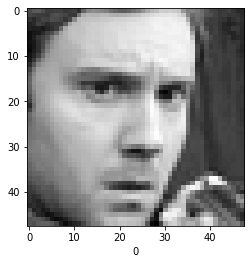

In [48]:
plt.imshow(img, cmap='gray')
plt.xlabel(df.iloc[0]['emotion'])

In [17]:
X = []
y = []

In [18]:
def getData(path):
    anger = 0
    fear = 0
    sad = 0
    happy = 0
    surprise = 0
    neutral = 0
    df = pd.read_csv(path)
    
    X = []
    y = []    
    
    for i in range(len(df)):
        if df.iloc[i]['emotion'] != 1:
            if df.iloc[i]['emotion'] == 0:
                if anger <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    anger += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 2:
                if fear <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    fear += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 3:
                if happy <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    happy += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 4:
                if sad <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    sad += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 5:
                if surprise <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    surprise += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 6:
                if neutral <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    neutral += 1
                else:
                    pass

            
            
    return X, y  
    

# Loading the dataset

In [21]:
X, y = getData('./fer2013.csv')

In [22]:
np.unique(y, return_counts=True)

(array([0, 2, 3, 4, 5, 6], dtype=int64),
 array([4001, 4001, 4001, 4001, 4001, 4001], dtype=int64))

In [23]:
X = np.array(X)/255.0
y = np.array(y)

In [24]:
X.shape, y.shape

((24006, 2304), (24006,))

In [25]:
y_o = []
for i in y:
    if i != 6:
        y_o.append(i)
        
    else:
        y_o.append(1)

In [26]:
np.unique(y_o, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([4001, 4001, 4001, 4001, 4001, 4001], dtype=int64))

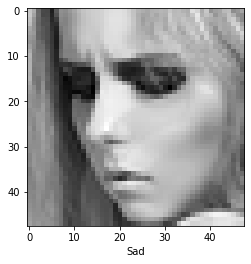

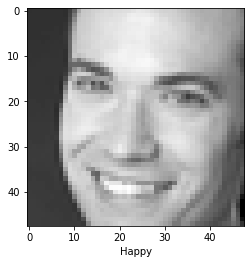

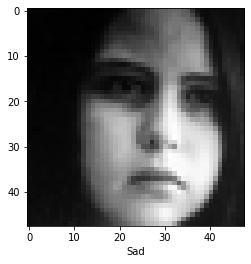

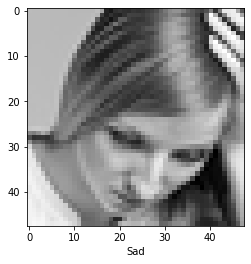

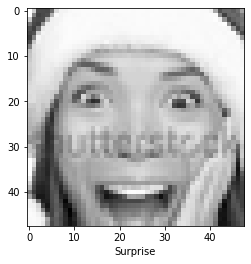

In [27]:
for i in range(5):
    r = np.random.randint((1), 24000, 1)[0]
    plt.figure()
    plt.imshow(X[r].reshape(48,48), cmap='gray')
    plt.xlabel(label_map[y_o[r]])

In [28]:
X = X.reshape(len(X), 48, 48, 1)

In [29]:
# no_of_images, height, width, coloar_map

In [30]:
X.shape

(24006, 48, 48, 1)

In [31]:
from keras.utils import to_categorical
y_new = to_categorical(y_o, num_classes=6)

Using TensorFlow backend.
D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tenso

In [32]:
len(y_o), y_new.shape

(24006, (24006, 6))

In [33]:
y_o[150], y_new[150]

(0, array([1., 0., 0., 0., 0., 0.], dtype=float32))

In [34]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

# Implementing CNN 

In [35]:
model = Sequential()


input_shape = (48,48,1)


model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

## (15, 15) --->  30
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

# Training the model for 22 epochs

In [36]:
model.fit(X, y_new, epochs=22, batch_size=64, shuffle=True, validation_split=0.2)


Train on 19204 samples, validate on 4802 samples
Epoch 1/22
19204/19204 [==============================] - 941s 49ms/step - loss: 2.1196 - accuracy: 0.2506 - val_loss: 3.1224 - val_accuracy: 0.1120
Epoch 2/22
19204/19204 [==============================] - 1029s 54ms/step - loss: 1.6831 - accuracy: 0.3419 - val_loss: 1.9673 - val_accuracy: 0.2820
Epoch 3/22
19204/19204 [==============================] - 1022s 53ms/step - loss: 1.5141 - accuracy: 0.4075 - val_loss: 1.2800 - val_accuracy: 0.5104
Epoch 4/22
19204/19204 [==============================] - 1021s 53ms/step - loss: 1.3980 - accuracy: 0.4606 - val_loss: 1.3254 - val_accuracy: 0.4708
Epoch 5/22
19204/19204 [==============================] - 1327s 69ms/step - loss: 1.3135 - accuracy: 0.4903 - val_loss: 1.6442 - val_accuracy: 0.3419
Epoch 6/22
19204/19204 [==============================] - 2481s 129ms/step - loss: 1.2217 - accuracy: 0.5231 - val_loss: 1.2263 - val_accuracy: 0.5217
Epoch 7/22
19204/19204 [==========================

<h1> saving the model

In [38]:
model.save('model.h5')

In [39]:
import cv2

In [43]:
test_img = cv2.imread('./static/angry.jpg', 0)
test_img

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8)

In [44]:
test_img.shape

(270, 360)

In [45]:
test_img = cv2.resize(test_img, (48,48))
test_img.shape

(48, 48)

In [46]:
test_img = test_img.reshape(1,48,48,1)

# Predicting the results

In [47]:
model.predict(test_img)

array([[0., 0., 0., 0., 0., 1.]], dtype=float32)